In [4]:
!cd ../ && mvn clean install

[INFO] Scanning for projects...
[INFO] 
[INFO] -------------< org.example:ComputationalGeometryProjectV2 >-------------
[INFO] Building ComputationalGeometryProjectV2 1.0-SNAPSHOT
[INFO] --------------------------------[ jar ]---------------------------------
[INFO] 
[INFO] --- maven-clean-plugin:2.5:clean (default-clean) @ ComputationalGeometryProjectV2 ---
[INFO] Deleting C:\Users\Александр\Desktop\ComputationalGeometryProjectV2\target
[INFO] 
[INFO] --- maven-resources-plugin:2.6:resources (default-resources) @ ComputationalGeometryProjectV2 ---
[WARNING] Using platform encoding (Cp1251 actually) to copy filtered resources, i.e. build is platform dependent!
[INFO] Copying 0 resource
[INFO] 
[INFO] --- maven-compiler-plugin:3.1:compile (default-compile) @ ComputationalGeometryProjectV2 ---
[INFO] Changes detected - recompiling the module!
[WARNING] File encoding has not been set, using platform encoding Cp1251, i.e. build is platform dependent!
[INFO] Compiling 5 source files to C:\U

In [5]:
from random import random
import os
import matplotlib.pyplot as plt
import numpy as np

width = 98
height = 148
points_count=200
fname="points.txt"

filename="../python/"+fname
outputfile="../python/triangulation.txt"

points = []
triangles = []

def generateRandomPoints():
    global points,points_count,width,height,fname;
    points = [[1+random()*width,1+random()*height] for x in range(points_count)]
    with open(fname,"w+") as f:
        for p in points:
            f.write(" ".join(map(lambda x: "%.3f"%x,p)));
            f.write("\n")

def runTriangulationAlgorithm():
    global filename,outputfile
    assert os.system("cd ../target/ && java -jar triangulation.jar %d %d %s %s"%(width,height,filename,outputfile))==0


def parseTriangles():
    global triangles;
    triangles = []

    with open(outputfile,"r") as f:
        for line in f.readlines():
            t = list(map(float,line.split()))
            triangle = [
                [t[0],t[1]],
                [t[2],t[3]],
                [t[4],t[5]]
            ]
            triangles.append(triangle)

    print(triangles)

def drawTriangulation():
    global triangles;
    triangles = np.array(triangles,dtype=float)
    for t in triangles:
        t1 = plt.Polygon(t[:3,:],edgecolor="red",facecolor="none")
        plt.gca().add_patch(t1)
        plt.scatter(t[:,0],t[:,1],s=10,color="blue")
    plt.show()

def processEverything():
    generateRandomPoints()
    runTriangulationAlgorithm()
    parseTriangles()
    drawTriangulation()

[[[74.672, 2.14], [69.088, 2.061], [98.0, 0.0]], [[74.672, 2.14], [67.64, 2.613], [0.0, 0.0]], [[94.699, 3.028], [67.64, 2.613], [98.0, 0.0]], [[94.699, 3.028], [33.176, 3.184], [0.0, 0.0]], [[33.176, 3.184], [21.375, 3.371], [0.0, 0.0]], [[32.558, 4.608], [21.375, 3.371], [98.0, 0.0]], [[77.123, 5.84], [32.558, 4.608], [98.0, 0.0]], [[77.123, 5.84], [55.245, 6.414], [0.0, 0.0]], [[74.471, 6.679], [55.245, 6.414], [98.0, 0.0]], [[74.471, 6.679], [22.826, 7.101], [0.0, 0.0]]]


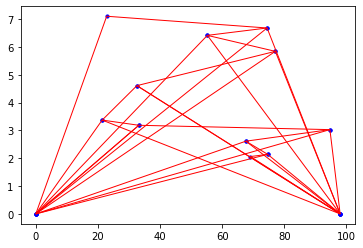

[[[19.274, 1.982], [10.368, 1.086], [98.0, 0.0]], [[62.205, 4.566], [19.274, 1.982], [98.0, 0.0]], [[62.205, 4.566], [43.791, 6.5], [0.0, 0.0]], [[78.58, 8.084], [43.791, 6.5], [98.0, 0.0]], [[78.58, 8.084], [39.49, 8.764], [0.0, 0.0]], [[46.058, 8.924], [39.49, 8.764], [98.0, 0.0]], [[92.898, 9.747], [46.058, 8.924], [98.0, 0.0]], [[92.898, 9.747], [18.623, 9.942], [0.0, 0.0]], [[37.996, 10.149], [18.623, 9.942], [98.0, 0.0]], [[37.996, 10.149], [12.174, 11.254], [0.0, 0.0]]]


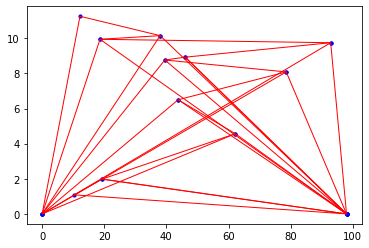

In [14]:
for i in range(2):
    processEverything()
